In [13]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import model_selection, ensemble, decomposition, svm, feature_selection
from matplotlib import pyplot as plt
import scikitplot as skplt # 绘画roc曲线

In [4]:
file_path = '/Users/apple/Desktop/Santander/train.csv'
data = pd.read_csv(file_path)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
data.shape

(200000, 202)

In [6]:
X = data.iloc[:, 2:]
y = data['target']

X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3, random_state=0)
# 恢复索引
for i in [X_train,X_test, y_train, y_test]:
    i.index = range(i.shape[0])
    
    

In [8]:
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=100,
                                      n_jobs=10,
                                      random_state=66,
                                     ).fit(X_train, y_train)
print(clf.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.8981


'02:58'

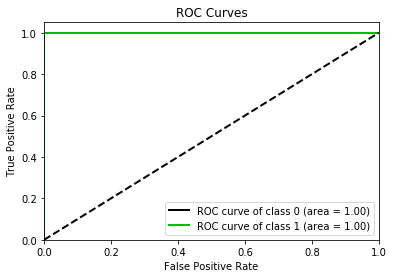

In [11]:
skplt.metrics.plot_roc(y_train,
                        clf.predict_proba(X_train),
                        plot_micro=False,
                        plot_macro=False,
                      )

In [16]:
# 特征选择 
# 第一种尝试 先过滤掉方差为0的数据 过滤掉2个
X_var = feature_selection.VarianceThreshold().fit_transform(X)
X_var.shape

In [18]:
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=100,
                                      n_jobs=10,
                                      random_state=66,
                                     ).fit(X_var, y)
print(clf.score(X_var, y))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

1.0


'04:36'

In [20]:
# 再次使用方差过滤 过滤掉方差小于0.005的数据 
X_var = feature_selection.VarianceThreshold(0.01).fit_transform(X)
X_var.shape

(200000, 199)

In [ ]:
# 再次使用相关性过滤 过滤掉与标签值无关的特征



In [6]:
# 对于样本不均衡问题采用class_weight 来设置
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=100, 
                                      class_weight='balanced',
                                     ).fit(X_train, y_train)
print(rfc.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.8981


'04:55'

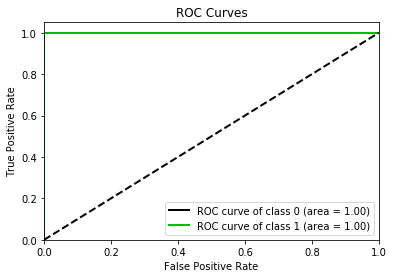

In [13]:
# 虽然这样auc面积很好 但是准确率有点低
skplt.metrics.plot_roc(y_train,
                        rfc.predict_proba(X_train),
                        plot_micro=False,
                        plot_macro=False,
#                         classes_to_plot=None,
#                         ax=None,
#                         figsize=None,
#                         cmap='nipy_spectral',
#                         title_fontsize='large',
#                         text_fontsize='medium',
                      )

In [ ]:
# 调参
# 使用n_estimators 绘画学习曲线  挑选出最优的n_estimators
train_score = []
test_score = []
for i in range(10, 600, 40):
    clf = ensemble.RandomForestClassifier(n_estimators=i, 
                                          oob_score=True, 
                                          n_jobs=4,
                                          random_state=66,
                                         ).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.oob_score_)

plt.figure()
plt.plot(range(10, 600, 40), train_score, 'b--')
plt.plot(range(10, 600, 40), test_score, 'r-')
plt.show()

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
